In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os
from numpy import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
# Reading data fom csv file
DATADIR = '/content/drive/MyDrive/MedicalCostAnalysis'

df = pd.read_csv(os.path.join(DATADIR, 'insurance.csv'))

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## BMI

(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <a list of 10 Patch objects>)

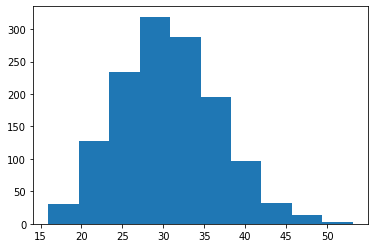

In [ ]:
bmi = df["bmi"].values.reshape(-1,1)
plt.hist(bmi)

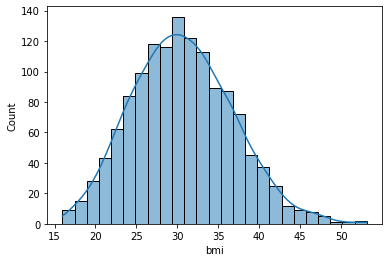

In [ ]:
sns.histplot(data=df, x="bmi", kde=True)

## Smoker vs Charges

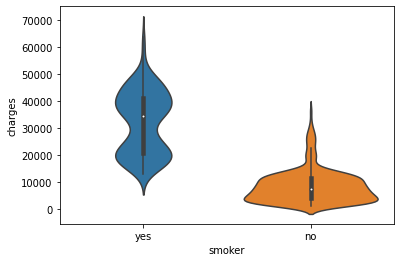

In [ ]:
sns.violinplot(data=df, x='smoker', y='charges')

## Smoker vs Region

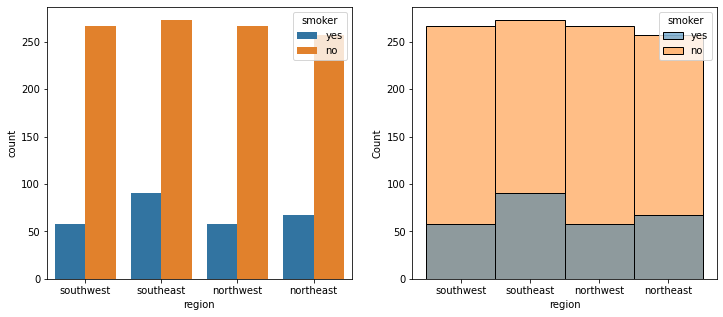

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.countplot(x='region', data=df, hue='smoker', ax=ax[0])
sns.histplot(x='region', data=df, hue='smoker', ax=ax[1])
fig.show()

## BMI vs Sex

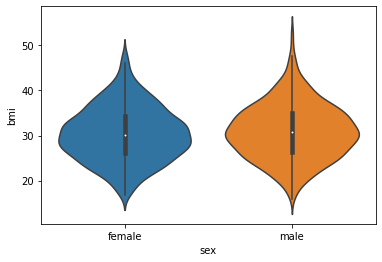

In [ ]:
sns.violinplot(data=df, x='sex', y='bmi')

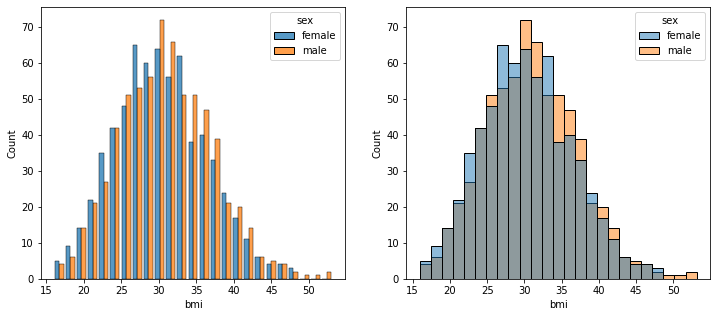

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(data=df, hue='sex', x='bmi', multiple="dodge", shrink=.8, ax=ax[0])
sns.histplot(data=df, hue='sex', x='bmi', ax=ax[1])
fig.show()

## Region vs Children

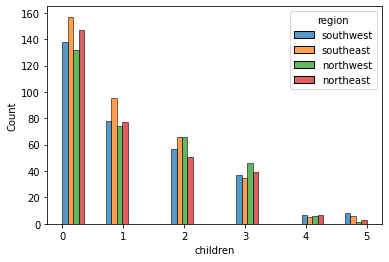

In [ ]:
sns.histplot(data=df, hue='region', x='children', multiple="dodge")

## Age vs BMI

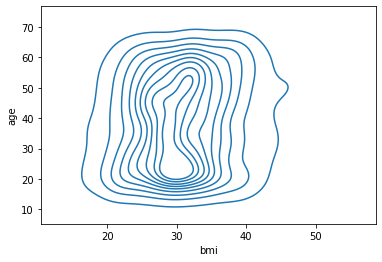

In [ ]:
sns.kdeplot(data=df, x='bmi', y='age')

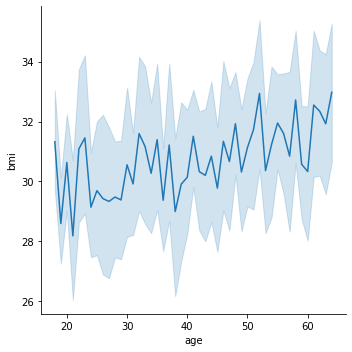

In [ ]:
sns.relplot(data=df,x='age',y='bmi',kind='line')

## BMI Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


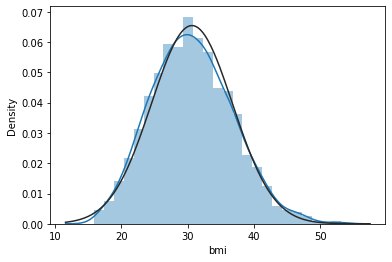

In [ ]:
from scipy.stats import norm
ax = sns.distplot(df.bmi, fit=norm, kde=True)


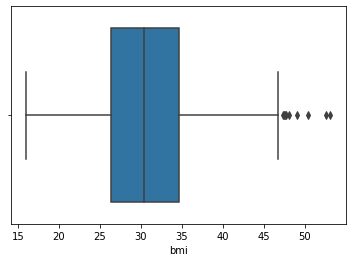

In [ ]:
sns.boxplot(data=df, x='bmi')

## BMI vs Charges

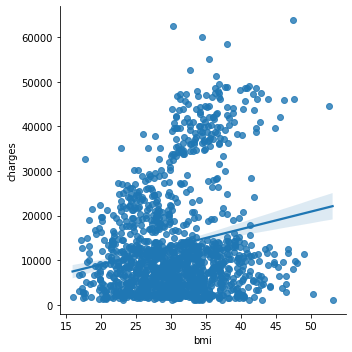

In [ ]:
sns.lmplot(data=df, x='bmi',y='charges')

Region vs Smoker vs BMI

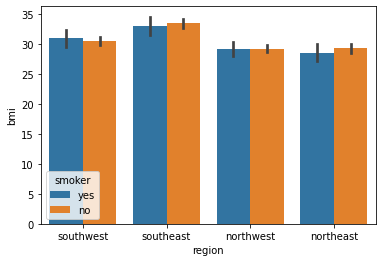

In [ ]:
sns.barplot(data=df, y='bmi', x='region', hue='smoker')

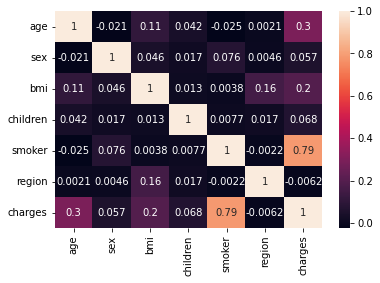

In [ ]:
_temp_df = df.copy()
#sex
le = LabelEncoder()
le.fit(_temp_df.sex.drop_duplicates()) 
_temp_df.sex = le.transform(_temp_df.sex)
# smoker or not
le.fit(_temp_df.smoker.drop_duplicates()) 
_temp_df.smoker = le.transform(_temp_df.smoker)
#region
le.fit(_temp_df.region.drop_duplicates()) 
_temp_df.region = le.transform(_temp_df.region)

# Correlation heatmap
sns.heatmap(_temp_df.corr(), annot= True);

## Separate The Target 

In [ ]:
X = df.drop(columns=["charges"])
y = df["charges"]

## Encoding

In [ ]:
# Label: smoker, sex
# Onehot: region

X = pd.get_dummies(data = X, columns=["region", "sex", "smoker"], drop_first=True)

X.head()

,age,bmi,children,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,27.900,0,0,0,1,0,1
1,18,33.770,1,0,1,0,1,0
2,28,33.000,3,0,1,0,1,0
3,33,22.705,0,1,0,0,1,0
4,32,28.880,0,1,0,0,1,0


## Train Validation Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

## Normalization

In [ ]:
X.head()

,age,bmi,children,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,27.900,0,0,0,1,0,1
1,18,33.770,1,0,1,0,1,0
2,28,33.000,3,0,1,0,1,0
3,33,22.705,0,1,0,0,1,0
4,32,28.880,0,1,0,0,1,0


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(np.mean(X), np.std(X), sep="\n")
print("-"*20)
print(np.mean(X_train_scaled), np.std(X_train_scaled), sep="\n")

age                 39.207025
bmi                 30.663397
children             1.094918
region_northwest     0.242900
region_southeast     0.272048
region_southwest     0.242900
sex_male             0.505232
smoker_yes           0.204783
dtype: float64
age                 14.044709
bmi                  6.095908
children             1.205042
region_northwest     0.428835
region_southeast     0.445014
region_southwest     0.428835
sex_male             0.499973
smoker_yes           0.403543
dtype: float64
--------------------
-9.836368479856527e-17
0.9999999999999999


## Model Selection

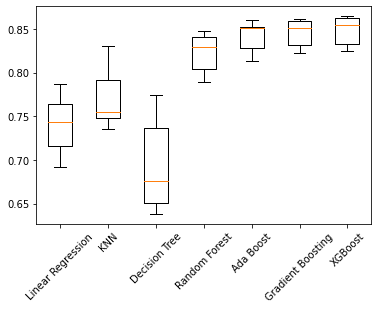

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Ada Boost': AdaBoostRegressor(n_estimators=50, learning_rate =.01),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(objective ='reg:squarederror', verbosity = 0,),
}

results = []

for model in models.values():
    kf = KFold(n_splits=6, random_state=46, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)

plt.boxplot(x=results, labels=models.keys())
plt.xticks(rotation=45)
plt.show()

As a result of the model selection, it is seen that the most suitable model for our data is XGBoost.

## Hyperparameter Optimization

In [ ]:
xgb = XGBRegressor(objective ='reg:squarederror')

parameters = {
              'eta': [.03, .07, 0.1], #(eta or shrinkage)
              "min_child_weight": [.1, .5, 1],
              "max_depth" : [4, 5, 6, 7]}


xgb_grid = GridSearchCV(xgb,
                        parameters,
                        cv = 5,
                        n_jobs = -1
                        )

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.8373211995875687
{'eta': 0.03, 'max_depth': 4, 'min_child_weight': 0.1}


## Model Evaluation

In [ ]:
# Training the model
xgb_model = XGBRegressor(objective ='reg:squarederror', learning_rate=0.03, max_depth = 4, min_child_weight = 0.1)
xgb_model.fit(X_train, y_train)
# Prediction
predictions = xgb_model.predict(X_test)

In [ ]:
# Comparison of actual and prediction
comparison = pd.DataFrame({"Actual Values": y_test,"Predictions": predictions})
comparison.head()

,Actual Values,Predictions
141,3490.5491,5532.391602
1065,7045.4990,6259.016113
467,12643.3778,13591.695312
557,3935.1799,5990.499023
166,4830.6300,6135.129883


In [ ]:
# Calculation of Root Mean Squared Error, Mean Absolute Error and r2_score
rmse = sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [ ]:
scores = pd.DataFrame(data={"Mean Squared Error": [rmse], "Mean Absolute Error": [mae], "R2 Score": [r2]})
scores

,Mean Squared Error,Mean Absolute Error,R2 Score
0,3968.528158,2083.3685,0.892227
